![MSE Logo](https://moodle.msengineering.ch/pluginfile.php/1/core_admin/logo/0x150/1643104191/logo-mse.png)

# AdvNLP Lab 1: Text Tokenization


The goal of this lab is to perform tokenization of texts using the [NLTK](http://www.nltk.org/) toolkit or using BPE from [SentencePiece](https://github.com/google/sentencepiece).  You will use the environment that you set up following the instructions of the introductory Jupyter notebook.  

You will use NLTK functions to get texts from the web and segment (split) them into sentences and words (also called *tokens*).  You will experiment with extracting statistics about the frequencies of tokens, and compare statistics for a novel and an undeciphered manuscript. 

To submit your work, please execute all cells of this notebook, save it, and submit it as homework on Moodle.

## 1. Using NLTK to download and tokenize a text

Please install NLTK (the Natural Language Processing Toolkit) by following the installation instructions at the [NLTK website](http://www.nltk.org/install.html).  To use NLTK, first `import nltk`.  NLTK has a download manager (try `nltk.download()` in command line) which can import several resources, including corpora.

To get started, look at [Chapter 1](http://www.nltk.org/book/ch01.html) of the [online NLTK book (NLP with Python)](http://www.nltk.org/book/) and use the commands there as a model.  <span style="color:gray">Note: the online book was updated for Python 3, but the [printed book](http://shop.oreilly.com/product/9780596516499.do) is only for Python 2.</span> 

In [6]:
#!pip install nltk

In [7]:
import nltk
#nltk.download('punkt') # execute only once after installing NLTK, then comment it out
#nltk.download('punkt_tab')

**1a.** Using inspiration from [Chapter 3 (3.1. Processing Raw Text) of the NLTK book](http://www.nltk.org/book/ch03.html), download a book from the Gutenberg Project in text format. What is its size? Are these bytes or characters? <span style="color:gray">Note: to learn more about special characters, you can refer to Python's documentation of [Unicode support](https://docs.python.org/3/howto/unicode.html).</span>

In [8]:
from urllib import request # you may need to run first:  !pip install urllib

In [9]:
import os
# Book download
url = "https://www.gutenberg.org/ebooks/15960.txt.utf-8"
filename = "book.txt"

# Download the file
response = request.urlopen(url)
data = response.read()

# Save it locally
with open(filename, "wb") as f:
    f.write(data)

print("Book download complete.")

# Book file size
file_size = os.path.getsize("book.txt")
print("Book size in bytes:", file_size)

Book download complete.
Book size in bytes: 1174876


**1b.** We want to keep only the original text of the book, without the header, preface, or license.  Please determine (e.g. by locating the position of initial and final strings) how much your should trim from the beginning and from the end in order to keep only the original text of the book (including titles). Please remove unnecessary paragraph marks (e.g. if the text is segmented into fixed-length lines). Save the result as a new string and display its length.

In [10]:
input_file = "book.txt"
output_file = "book_cleaned.txt"

# Read file as lines
with open(input_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

start_index = None
end_index = None

# Find markers
for i, line in enumerate(lines):
    if "*** START OF THE PROJECT" in line and start_index is None:
        start_index = i
    if "*** END OF THE PROJECT" in line:
        end_index = i
        break

if start_index is None or end_index is None or end_index <= start_index:
    raise ValueError("Could not find valid START/END markers in the file.")

# How much to trim (in lines)
trim_begin_lines = start_index + 1
trim_end_lines = len(lines) - end_index

# Extract main content (exclude marker lines)
content = lines[start_index + 1:end_index]

# Remove empty lines after START
while content and content[0].strip() == "":
    content.pop(0)

# Remove empty lines before END
while content and content[-1].strip() == "":
    content.pop()

# Join text
cleaned_text = "".join(content)

# Remove fixed-length line breaks for better NLP tokenization
cleaned_text = cleaned_text.replace("\n", " ")
cleaned_text = " ".join(cleaned_text.split())

print("Trimmed from beginning (lines):", trim_begin_lines)
print("Trimmed from end (lines):", trim_end_lines)
print("Length of cleaned text (characters):", len(cleaned_text))

# Save cleaned text
with open(output_file, "w", encoding="utf-8") as f:
    f.write(cleaned_text)

print(f"Cleaned file saved as: {output_file}")

Trimmed from beginning (lines): 25
Trimmed from end (lines): 351
Length of cleaned text (characters): 1126609
Cleaned file saved as: book_cleaned.txt


**1c.** NLTK defines a function to segment a text into sentences (`nltk.sent_tokenize(...)` (documented [here](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize))) and another one to tokenize a text into words (`nltk.word_tokenize(...)` (documented [here](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize))). <span style="color:gray">Note: NLTK calls the first one "sentence tokenization", which is unusual.</span>

Please segment the text above into sentences with NLTK, display the number of sentences, and display five sentences of your choice.  Please assess briefly the quality of the segmentation.  If you think that some special characters degrade the results, please go back and remove or replace them in the full text.

In [11]:
sentenc_list = nltk.tokenize.sent_tokenize(cleaned_text)
for sentenc in sentenc_list[101:106]:
    print(sentenc)
print(len(sentenc_list))

For the fifth time I revise a subject which has occupied my inquiries from early life, with feelings still delightful, and an enthusiasm not wholly diminished.
Had not the principle upon which this work is constructed occurred to me in my youth, the materials which illustrate the literary character could never have been brought together.
It was in early life that I conceived the idea of pursuing the history of genius by the similar events which had occurred to men of genius.
Searching into literary history for the literary character formed a course of experimental philosophy in which every new essay verified a former trial, and confirmed a former truth.
By the great philosophical principle of induction, inferences were deduced and results established, which, however vague and doubtful in speculation, are irresistible when the appeal is made to facts as they relate to others, and to feelings which must be decided on as they are passing in our own breast.
6811


**1d.** Please save the resulting text into a file, one sentence per line.

In [12]:
# Save sentences to file
output_file = "sentences.txt"

with open(output_file, "w", encoding="utf-8") as f:
    for sentence in sentenc_list:
        f.write(sentence + "\n")

**1e.** Please segment each sentence into tokens,  store the result in a new variable (a list of lists), and display the same five sentences as above.  Please comment briefly on the quality of the tokenization.

In [13]:
lis_of_lis = []
for sentenc in sentenc_list:
    worl_sent_list = nltk.tokenize.word_tokenize(sentenc)
    lis_of_lis.append(worl_sent_list)

for sent_word_list in lis_of_lis[101:106]:
    print(sent_word_list)

['For', 'the', 'fifth', 'time', 'I', 'revise', 'a', 'subject', 'which', 'has', 'occupied', 'my', 'inquiries', 'from', 'early', 'life', ',', 'with', 'feelings', 'still', 'delightful', ',', 'and', 'an', 'enthusiasm', 'not', 'wholly', 'diminished', '.']
['Had', 'not', 'the', 'principle', 'upon', 'which', 'this', 'work', 'is', 'constructed', 'occurred', 'to', 'me', 'in', 'my', 'youth', ',', 'the', 'materials', 'which', 'illustrate', 'the', 'literary', 'character', 'could', 'never', 'have', 'been', 'brought', 'together', '.']
['It', 'was', 'in', 'early', 'life', 'that', 'I', 'conceived', 'the', 'idea', 'of', 'pursuing', 'the', 'history', 'of', 'genius', 'by', 'the', 'similar', 'events', 'which', 'had', 'occurred', 'to', 'men', 'of', 'genius', '.']
['Searching', 'into', 'literary', 'history', 'for', 'the', 'literary', 'character', 'formed', 'a', 'course', 'of', 'experimental', 'philosophy', 'in', 'which', 'every', 'new', 'essay', 'verified', 'a', 'former', 'trial', ',', 'and', 'confirmed', '

**1f.** Please display the total number of tokens found in the text by this method (sentence segmentation followed by sentence-level tokenization).

In [14]:
total_tokens_lisoflis = 0

for sentens_word_list in lis_of_lis:
    total_tokens_lisoflis += len(sentens_word_list)

print("Total amount of tokens in the list of lists:", total_tokens_lisoflis)


Total amount of tokens in the list of lists: 222806


**1g.** Please tokenize now directly the initial full text, without segmenting it into sentences.  Please display the total number of tokens found, and compare this number with the one obtained above.

In [15]:
total_text_tokens = len(nltk.tokenize.word_tokenize(cleaned_text))

print("Total ammount of tokens in the text, via raw text to word tokenizer:", total_text_tokens)


Total ammount of tokens in the text, via raw text to word tokenizer: 222801


## 2. Computing lexical statistics 

**2a.** Please determine the size of the vocabulary of your text (the number of unique *types*) by converting the list of tokens to a Python `set`.  Note that these *types* include punctuations and other symbols found through tokenization, and that uppercase/lowercase letters are different.

In [16]:
vocab_set = set(nltk.tokenize.word_tokenize(cleaned_text))
len(vocab_set)


18515

**2b.** What is the type-to-token ratio (TTR) of your text?

In [17]:
print("The Type to token ratio of the text is:", len(vocab_set)/total_text_tokens)

The Type to token ratio of the text is: 0.08310106328068545


**2c.** Please create a `nltk.Text` object from the tokenized version of your text, without the sentence segmentation.  Such an object will enable you to compute statistics using NLTK functions.  [Chapter 1 of the NLTK book](http://www.nltk.org/book/ch01.html) provides examples of use.

<span style="color:gray">Note: `nltk.word_tokenize()` and `nltk.sent_tokenize()` apply to strings but not directly to `ntlk.Text` objects.  A `nltk.Text` object can store either a string, or a list of words, or a list of sentences (list of lists of strings).</span>

In [18]:
nltext = nltk.Text(nltk.tokenize.word_tokenize(cleaned_text))
nltext

<Text: E-text prepared by Jonathan Ingram , John R....>

**2d.** Please construct the frequency distribution of your text, which is an object of the `nltk.FreqDist`class, instantiated directly from the `nltk.Text` object containing the list of all words. See [Sec. 3.1 of Ch. 1 of the NLTK book](http://www.nltk.org/book/ch01.html#frequency-distributions).  Using the `most_common` method on the `FreqDist` object, find the 50 most frequent words in your text, and display among them the words that have at least 4 characters.  Please comment briefly on the results.

In [19]:
voc_distributio = nltk.FreqDist(nltext)
for entry in voc_distributio.most_common(50):
    if len(entry[0])>3:
        print(entry[0])


# COMMENT ON THE RESULT (to check)
# We see in the resluts words like "that", "which" and more which war very common words in english, used for gramatical purpuses rather then conveing specific meaning them self.
# But we also see words like "genius" and "great" which do not fall in to the fist category of words, where they do hold greater meaning in the sentenc and are text specific, that they appre so offen, and not like the first category.

that
which
with
their
have
this
genius
from
they
were
great


## 3. Testing Zipf's law on a book

[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) formalizes the following empirical observation for large texts or collections: when ranking word types by decreasing frequencies, the ranks *x* (i.e. 1, 2, 3, ...) and the numbers of occurrences *y* (e.g. 948, 321, 146, ...) of each word are related approximately by the formula *y = a / x^b*.  The parameters *a* and *b* depend on the text.  If plotted in log-log coordinates, this relation results in a linear plot (because log(*y*) = *a* - *b* log(*x*)).

**3a.** Using the `FreqDist` object, please collect the frequencies of the 1000 most frequent words, rank them by decreasing values, and plot the (*rank*, *frequency*) curve on a log-log scale by setting the `.xscale("log")` and `.yscale("log")` parameters of the plot.

In [20]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: C:\Users\pd\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
#%matplotlib inline


**3b.** Please find the values of *a* and *b* which lead to the closest matching between the observation curve (*rank*, *frequency*) and Zipf's curve (*x*, *y = a / x^b*).  You can use `scipy.optimize.curve_fit()` or even a trial-and-error approach.  Please display both curves on the same graph with a log-log scale to visualize how close they are.  Please also display the optimal values of *a* and *b*.

In [23]:
import numpy as np 
import scipy

In [24]:
# Please write your Python code in this cell and execute it.


**3c.** Based on the graph, can you conclude that the frequencies of tokens in the text you select corroborate Zipf's law, or rather contradict it?

In [25]:
# Please write your answer in this cell.


## 4.  Does an undeciphered manuscript obey Zipf's law?

The [Voynich manuscript](https://en.wikipedia.org/wiki/Voynich_manuscript) is an undeciphered manuscript from the 15th century.   Its script and language are still unknown, and it may even be a hoax.  You can read more about it at [Voynich.nu](http://www.voynich.nu/), which provides pictures and transcriptions.  A version of it converted to ASCII characters (corresponding to symbols from the manuscript) and tokenized with one word per line is made available for this lab as `voynich.txt`.

**4a.** Please compute the number of tokens, the number of types, and the type-to-token ration (TTR) for this document.  How does it compare with your previous text?

In [26]:
with open("voynich.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

lines = [line.strip() for line in lines]
lines
print("TTR is:", len(set(lines))/len(lines))

# COMMENT BASED ON PREVOus CODE

TTR is: 0.26981787055970324


**4b.** Considering the 1000 most frequent tokens of the Voynich manuscript, do they follow Zipf's law?  Please also display the optimal values of *a* and *b* and the mean absolute percentage error. 

Estimated parameters:
a = 3074.677669878297
b = 1.0083768303906113
MAPE = 10.026375304739618


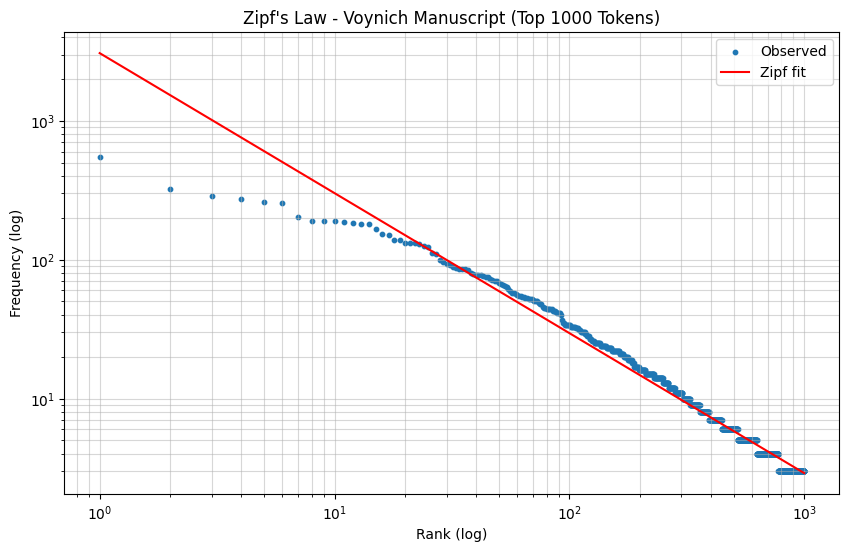

In [ ]:
text = " ".join(lines)

tokens = nltk.tokenize.word_tokenize(text)

dftext = nltk.FreqDist(tokens)

most_common_1000 = dftext.most_common(1000)

frequencies = np.array([freq for word, freq in most_common_1000])
ranks = np.arange(1, len(frequencies) + 1)

# ---- Estimate Zipf parameters ----

log_ranks = np.log(ranks)
log_freq = np.log(frequencies)

# Linear regression
b_neg, log_a = np.polyfit(log_ranks, log_freq, 1)

b = -b_neg
a = np.exp(log_a)

# Predicted frequencies from Zipf model
pred_freq = a * ranks ** (-b)

# ---- Mean Absolute Percentage Error ----

mape = np.mean(np.abs((frequencies - pred_freq) / frequencies)) * 100

print("Estimated parameters:")
print("a =", a)
print("b =", b)
print("MAPE =", mape)

# ---- Plot ----

plt.figure(figsize=(10,6))

plt.scatter(ranks, frequencies, s=10, label="Observed")

plt.plot(ranks, pred_freq, color="red", label="Zipf fit")

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Rank (log)")
plt.ylabel("Frequency (log)")
plt.title("Zipf's Law - Voynich Manuscript (Top 1000 Tokens)")

plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)

plt.show()


**4c.** What are your conclusions regarding Voynich's manuscript?  Is it likely to be similar to a real text in an unknown language?  In your answer, consider the values of TTR, the two parameters *a* and *b*, and the fitting of the *y = a / x^b* curve.

In [ ]:
######## TO CORRECT MAK MORE HuMAN
"""
The frequency distribution of the 1000 most frequent tokens follows Zipf’s law quite closely. The estimated parameters are 
𝑎
=
3074.68
a=3074.68 and 
𝑏
=
1.008
b=1.008. The exponent 
𝑏
b is very close to the theoretical value of 1 expected for natural language. The mean absolute percentage error (MAPE) is approximately 10%, indicating that the Zipf model provides a good approximation of the observed token frequencies.
"""

## 5. Testing Zipf's law with BPE tokenization of the book and the manuscript

**5a.** Please install the SentencePiece tokenizer from https://github.com/google/sentencepiece (with `!pip install sentencepiece`).  Please read the "Usage instructions” from the repo, or the ones for the [Python module](https://github.com/google/sentencepiece/blob/master/python/README.md).  Please construct a BPE subword vocabulary (i.e. "train" the model) on your text, of size 1100.  Use here the file you saved in (1d).

In [29]:
import sentencepiece as spm

ModuleNotFoundError: No module named 'sentencepiece'

In [ ]:
# Please write your Python code in this cell and execute it.


**5b.** Please tokenize your text with this model, and display the number of tokens (i.e. size of vocabulary), the number of types, and the type-to-token ratio (TTR).

In [ ]:
# Please write your Python code in this cell and execute it.


**5c.** Please fit a Zipf's curve to the book, as tokenized with BPE, and display the two curves on a log-log scale.

In [ ]:
# Please write your Python code in this cell and execute it.


**5d.** Please perform the same operations on the Voynich manuscript with a BPE tokenizer build from this text.  Please display the number of tokens, types, TTR, and the fitted Zipf's curve.

In [ ]:
# Please write your Python code in this cell and execute it.


In [ ]:
# Please write your Python code in this cell and execute it.


**5e.** Please conclude: when using BPE, does the Voynich manuscript exhibit similar properties of token frequency as a real text?  Are the differences larger or smaller when using BPE then when using word-based tokenization ?

In [ ]:
# Please write your answer in this cell.


## 6. Analyzing Karpathy's BPE tokenization implementation

Please study the following  [minbpe repository](https://github.com/karpathy/minbpe) first and then answer the following questions by indicating the respective file plus codes lines which answer the question.

**6a.** What pre-processing steps are used before BPE training?

In [ ]:
# Please write your answer in this cell.


**6b.** What tie-breaking strategy is implemented for pairs with equal count statistics?

In [ ]:
# Please write your answer in this cell.


**6c.** Are single characters contained in the final vocabulary?

In [ ]:
# Please write your answer in this cell.


**6d.** How are out-of-vocabulary terms treated?

In [ ]:
# Please write your answer in this cell.


## End of AdvNLP Lab 1
Please clean and save the completed notebook, and upload it to Moodle.